In [12]:
import json
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('kc_house_data.csv')


In [17]:
del df['waterfront']

In [18]:
del df['date']

In [20]:
del df['yr_renovated']

In [22]:
del df['view']

In [24]:
del df['lat']

In [26]:
del df['long']

In [39]:
del df['zipcode']

In [41]:
del df['id']

In [8]:
df.fillna(0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [5]:
import statsmodels.api as sm
X = df["price"]
y = df["condition"]
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              condition   R-squared (uncentered):                   0.666
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                          4.307e+04
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        08:27:34   Log-Likelihood:                         -45680.
No. Observations:               21597   AIC:                                  9.136e+04
Df Residuals:                   21596   BIC:                                  9.137e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price       4.336e-06   2.09e-08    207.528      0.000     4.3e-06    4.38e-06
==============================================================================
Omnibus:                    16289.839   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           679466.531
Skew:                          -3.223   Prob(JB):                         0.00
Kurtosis:                      29.712   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y = df[["price"]]
X = df.drop(["id", "zipcode", "lat", "long", "date", "waterfront", "sqft_basement"], axis=1)

scale = MinMaxScaler()
transformed = scale.fit_transform(X)
X = pd.DataFrame(transformed, columns = X.columns)

In [17]:
X = X.fillna(0)

In [18]:


# Perform t`est train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Build a Ridge, Lasso and regular linear regression model. 
# Note how in scikit learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lin.coef_))
print("Unpenalized Linear Regression Intercept:{}".format(lin.intercept_))

Unpenalized Linear Regression Coefficients are:[[ 7.62200000e+06 -1.82256402e-09 -1.77244927e-09  4.24699745e-10
  -1.50385659e-09  6.78076632e-10 -9.94443498e-10 -2.65573663e-10
  -9.77087061e-10 -4.99287512e-10 -2.21447769e-11 -8.26310677e-10
  -4.87867276e-11 -3.68143240e-10]]
Unpenalized Linear Regression Intercept:[78000.]


In [20]:
print("Lasso Regression Coefficients are:{}".format(lasso.coef_))
print("Lasso Linear Regression Intercept:{}".format(lasso.intercept_))

Lasso Regression Coefficients are:[ 7.62174152e+06  0.00000000e+00  2.55727811e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.82594232e+00  0.00000000e+00
  2.93360132e+01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
Lasso Linear Regression Intercept:[78000.86968186]


In [21]:
print("Ridge Regression Coefficients are:{}".format(ridge.coef_))
print("Ridge Linear Regression Intercept:{}".format(ridge.intercept_))

Ridge Regression Coefficients are:[[ 7.36924956e+06 -4.07069364e+04  1.25998367e+04  6.83943736e+04
   5.47071616e+02  2.17255039e+03  9.42965916e+03  2.80584163e+03
   3.98380570e+04 -2.35322140e+02 -1.36746475e+04  1.38698616e+03
   4.74461229e+03 -1.57034499e+04]]
Ridge Linear Regression Intercept:[70851.1936952]


In [22]:
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)

y_h_lasso_train = np.reshape(lasso.predict(X_train),(17277,1))
y_h_lasso_test = np.reshape(lasso.predict(X_test),(4320,1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [70]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

Train Error Ridge Model price    9.269703e+11
dtype: float64
Test Error Ridge Model price    2.328463e+11
dtype: float64


Train Error Lasso Model price    1.666051e+06
dtype: float64
Test Error Lasso Model price    409873.430206
dtype: float64


Train Error Unpenalized Linear Model price    2.058969e-15
dtype: float64
Test Error Unpenalized Linear Model price    5.231036e-16
dtype: float64


In [23]:




housing_predictors = X.iloc[:,2:15]
corr = housing_predictors.corr()



In [26]:
housing_predictors.iloc[:,:15]

,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.066667,0.061503,0.003108,0.0,0.00,0.50,0.4,0.089602,0.478261,0.000000,0.161934,0.005742
1,0.233333,0.167046,0.004072,0.4,0.00,0.50,0.4,0.199115,0.443478,0.988089,0.222165,0.008027
2,0.066667,0.030372,0.005743,0.0,0.00,0.50,0.3,0.044248,0.286957,0.000000,0.399415,0.008513
3,0.333333,0.120729,0.002714,0.0,0.00,1.00,0.4,0.075221,0.565217,0.000000,0.165376,0.004996
4,0.200000,0.099468,0.004579,0.0,0.00,0.50,0.5,0.144912,0.756522,0.000000,0.241094,0.007871
5,0.533333,0.383447,0.061429,0.0,0.00,0.50,0.8,0.389381,0.878261,0.000000,0.750473,0.116339
6,0.233333,0.102126,0.003816,0.4,0.00,0.50,0.4,0.148783,0.826087,0.000000,0.316469,0.007085
7,0.133333,0.052392,0.005567,0.0,0.00,0.50,0.4,0.076327,0.547826,0.000000,0.215281,0.010407
8,0.066667,0.107062,0.004210,0.0,0.00,0.50,0.4,0.075221,0.521739,0.000000,0.237653,0.008572
9,0.266667,0.115414,0.003659,0.4,0.00,0.50,0.4,0.168142,0.895652,0.000000,0.342626,0.007948


In [27]:
corr

,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
bathrooms,1.000000,0.755758,0.088373,0.502582,0.186016,-0.126479,0.665838,0.686668,0.507173,0.047177,0.569884,0.088303
sqft_living,0.755758,1.000000,0.173453,0.353953,0.281715,-0.059445,0.762779,0.876448,0.318152,0.051060,0.756402,0.184342
sqft_lot,0.088373,0.173453,1.000000,-0.004814,0.075054,-0.008830,0.114731,0.184139,0.052946,0.004979,0.144763,0.718204
floors,0.502582,0.353953,-0.004814,1.000000,0.028414,-0.264075,0.458794,0.523989,0.489193,0.003793,0.280102,-0.010722
view,0.186016,0.281715,0.075054,0.028414,1.000000,0.045622,0.249082,0.166017,-0.054452,0.090339,0.278928,0.073083
condition,-0.126479,-0.059445,-0.008830,-0.264075,0.045622,1.000000,-0.146896,-0.158904,-0.361592,-0.055808,-0.093072,-0.003126
grade,0.665838,0.762779,0.114731,0.458794,0.249082,-0.146896,1.000000,0.756073,0.447865,0.015623,0.713867,0.120981
sqft_above,0.686668,0.876448,0.184139,0.523989,0.166017,-0.158904,0.756073,1.000000,0.424037,0.020645,0.731767,0.195077
yr_built,0.507173,0.318152,0.052946,0.489193,-0.054452,-0.361592,0.447865,0.424037,1.000000,-0.202555,0.326377,0.070777
yr_renovated,0.047177,0.051060,0.004979,0.003793,0.090339,-0.055808,0.015623,0.020645,-0.202555,1.000000,0.000683,0.004286


In [28]:
corr[abs(housing_predictors.corr() > 0.75)]

,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
bathrooms,1.000000,0.755758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,0.755758,1.000000,NaN,NaN,NaN,NaN,0.762779,0.876448,NaN,NaN,0.756402,NaN
sqft_lot,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
grade,NaN,0.762779,NaN,NaN,NaN,NaN,1.000000,0.756073,NaN,NaN,NaN,NaN
sqft_above,NaN,0.876448,NaN,NaN,NaN,NaN,0.756073,1.000000,NaN,NaN,NaN,NaN
yr_built,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
yr_renovated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


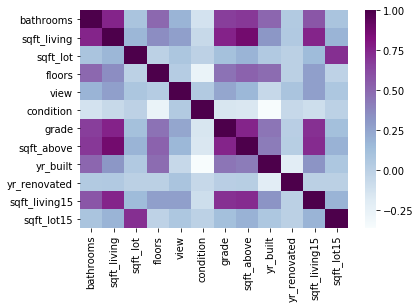

In [29]:
sns.heatmap(corr, cmap = "BuPu")
